<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/Ex_Matplotlib1_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Lab: Matplotlib

O principal objetivo desse lab é você entender como funciona a construção em camadas do `Matplotlib`, e como empregar os modos `script layer` e `artist layer` para produzir múltiplos gráficos em uma figura.

<br>

<img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="20%"/>

Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) Cap. 3






# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Exercício 1 `plt.plot()`, function. (**RESOLVIDO**)

Produza um gráfico de linha da função $tanh(x)$ para $x \in [-10,10]$.

1. Inclua um título com a função
2. Altere a cor e o estilo de linha do gráfico
3. Altere o tamanho da figura
4. Inclua rótulos para os eixos do gráfico

In [ ]:
def f(x):
  return np.tanh(x)

x = np.arange(-10.0,10.0,0.05)
y = f(x)

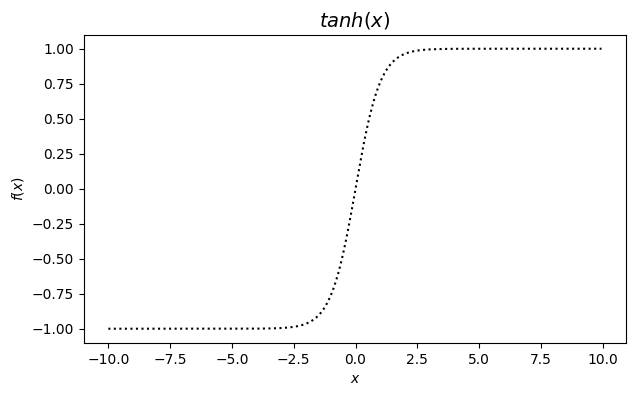

In [ ]:
plt.figure(figsize=(7,4))

plt.plot(x, y, color='k', linestyle=':')
# plt.plot(x, y, 'k:')
plt.title('$tanh(x)$',fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

# Exercício 2 `plt.plot()`, random data. (**RESOLVIDO**)

Produza um gráfico a partir do dataframe abaixo.

1. Inclua um título
2. Altere a cor e o estilo de linha do gráfico
3. Altere o tamanho da figura
4. Inclua rótulos para os eixos do gráfico

In [ ]:
df = pd.DataFrame()
df['x-values'] = np.arange(0,10,0.01)
df['y-values'] = np.random.sample(len(df))
df.head()


,x-values,y-values
0,0.00,0.690489
1,0.01,0.607927
2,0.02,0.838277
3,0.03,0.214866
4,0.04,0.472586


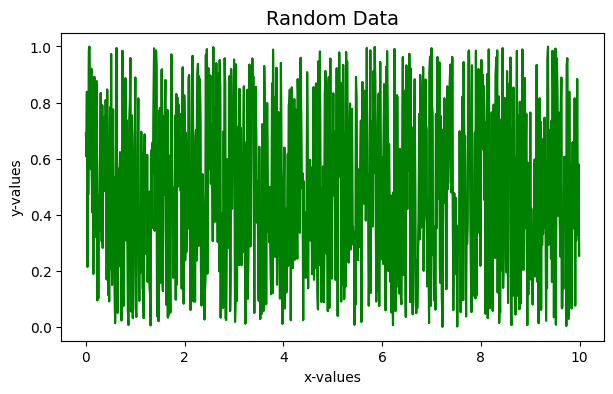

In [ ]:
plt.figure(figsize=(7,4))

plt.plot('x-values', 'y-values', data=df, color='g', linestyle='-')
# plt.plot(df['x-values'], df['y-values'], color='g', linestyle='-')
plt.title('Random Data',fontsize=14)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

# **CASE: fmri**

Nos exercícios a seguir partimos da seguinte base de dados:

In [ ]:
df = sns.load_dataset('fmri')
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# Pré Exercício!

Explore a base antes de prosseguir. **Ordene os dados no tempo** antes de seguir.

Dica: `df.sort_values()`

In [ ]:
df = df.sort_values('timepoint')
df.head()

,subject,timepoint,event,region,signal
1063,s0,0,cue,parietal,-0.006899
258,s7,0,stim,parietal,0.004081
259,s6,0,stim,parietal,-0.023319
260,s5,0,stim,parietal,-0.051228
865,s5,0,cue,frontal,-0.027033


In [ ]:
#@markdown This cell is configured to not execute. **Do not change this**.
%%script echo skipping
df = df.sort_values('timepoint')
df.head()

np.random.seed(1)
r = np.random.randint(0,len(df.subject.unique())+1,len(df.subject.unique()))
s = np.sort( df.subject.unique() )
r = s[r]

for i in range(len(s)):
  df.subject = df.subject.replace(r[i],'x')
  df.subject = df.subject.replace(s[i],r[i])
  df.subject = df.subject.replace('x',s[i])

df.to_csv('fmri.csv',index=None)

df = pd.read_csv('fmri.csv')
# df.head()


skipping


# Q1.

Produza um gráfico como abaixo para o sujeito `s0`. Observe todos os elementos do gráfico como a seleção dos dados (sujeito `s0`, região `parietal` e evento de `stim`), títulos e rótulos.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_3.png)

**Para o sujeito s0, os valores de sinal encontram-se melhor em que intervalo de valores?**





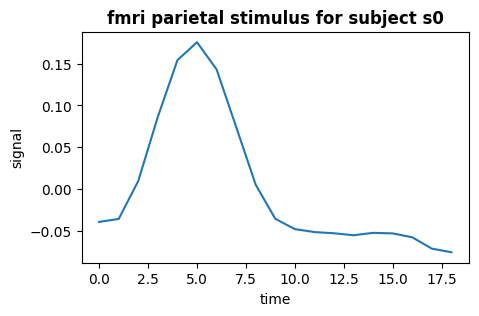

In [ ]:
fig = plt.figure(figsize=(5,3))

mask = (df.subject == 's0') & (df.event == 'stim') & (df.region == 'parietal')
plt.plot(df[ mask ].timepoint, df[ mask ].signal)

plt.title('fmri parietal stimulus for subject s0', fontsize=12, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')

plt.show()

fig.savefig('ex_matplotlib1_3.png')

Solução extra com mínimo e `yticks`

In [ ]:
fig = plt.figure(figsize=(5,3))

mask = (df.subject == 's0') & (df.event == 'stim') & (df.region == 'parietal')
plt.plot(df[ mask ].timepoint, df[ mask ].signal)

plt.plot(df.loc[ df[ mask ].signal.idxmin() ].timepoint, df.loc[ df[ mask ].signal.idxmin() ].signal,'ro')
plt.text(df.loc[ df[ mask ].signal.idxmin() ].timepoint - 1, df.loc[ df[ mask ].signal.idxmin() ].signal + 0.02,'Min')
plt.yticks(ticks=np.arange(df[ mask ].signal.min(), df[ mask ].signal.max(), 0.02))

plt.title('fmri parietal stimulus for subject s0', fontsize=12, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')

plt.show()

fig.savefig('ex_matplotlib1_3.png')

# Q2.

Produza um gráfico como abaixo para o sujeito `s0`. Observe todos os elementos do gráfico como a seleção dos dados (sujeito `s0`, região `parietal` e eventos de `stim` e `cue`), títulos e rótulos.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_4.png)


**Para o sujeito s0, os valores de repouso (cue) apresentam uma variação menor que a dos estímulos?**

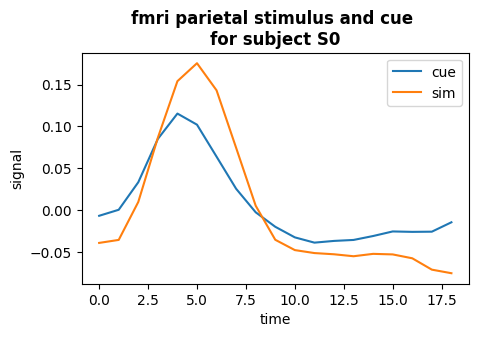

In [ ]:
fig = plt.figure(figsize=(5,3))

mask = (df.subject == 's0') & (df.event == 'cue') & (df.region == 'parietal')
plt.plot(df[ mask ].timepoint, df[ mask ].signal, label='cue')
mask = (df.subject == 's0') & (df.event == 'stim') & (df.region == 'parietal')
plt.plot(df[ mask ].timepoint, df[ mask ].signal, label='sim')

plt.title('fmri parietal stimulus and cue \nfor subject S0', fontsize=12, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()

plt.show()

fig.savefig('ex_matplotlib1_4.png')

Solução alternativa...

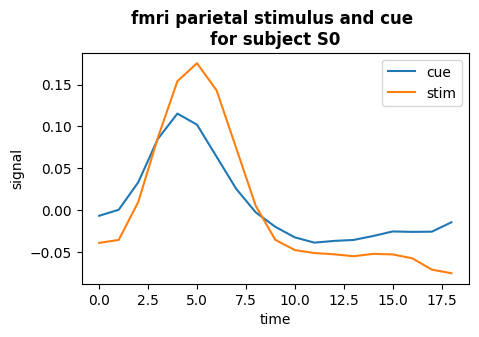

In [ ]:
fig = plt.figure(figsize=(5,3))

for e in df.event.unique():
  mask = (df.subject == 's0') & (df.event == e) & (df.region == 'parietal')
  plt.plot(df[ mask ].timepoint, df[ mask ].signal, label=e)

plt.title('fmri parietal stimulus and cue \nfor subject S0', fontsize=12, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()

plt.show()

# Q3. `plt.subplot(nrow, ncol, nr)`

Produza um gráfico como abaixo para os sujeitos `s0` e `s1`, em uma mesma figura empregando o modo `script layer`. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_5.png)

**Para o sujeito s1, os sinais apresentam uma variação menor, aproximadamente igual ou maior com relação ao sujeito s0?**

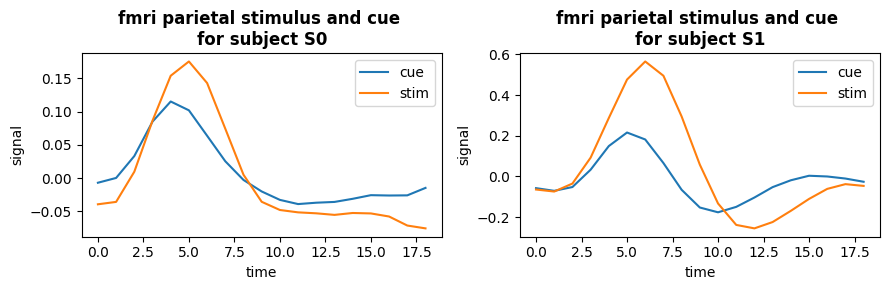

In [ ]:
fig = plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
for e in df.event.unique():
  mask = (df.subject == 's0') & (df.event == e) & (df.region == 'parietal')
  plt.plot(df[ mask ].timepoint, df[ mask ].signal, label=e)

plt.title('fmri parietal stimulus and cue \nfor subject S0', fontsize=12, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()

plt.subplot(1,2,2)
for e in df.event.unique():
  mask = (df.subject == 's1') & (df.event == e) & (df.region == 'parietal')
  plt.plot(df[ mask ].timepoint, df[ mask ].signal, label=e)

plt.title('fmri parietal stimulus and cue \nfor subject S1', fontsize=12, weight='bold')
plt.xlabel('time')
plt.ylabel('signal')
plt.legend()

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib1_5.png')

Solução alternativa...

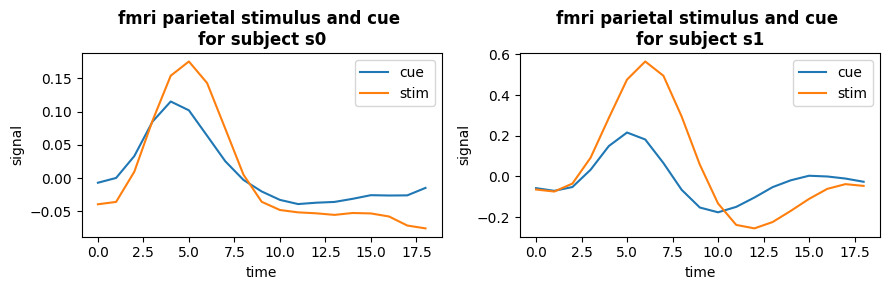

In [ ]:
fig = plt.figure(figsize=(9,3))

i = 1
for s in ['s0','s1']:
  plt.subplot(1,2,i)
  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    plt.plot(df[ mask ].timepoint, df[ mask ].signal, label=e)

  plt.title('fmri parietal stimulus and cue \nfor subject ' + s, fontsize=12, weight='bold')
  plt.xlabel('time')
  plt.ylabel('signal')
  plt.legend()

  i += 1

plt.tight_layout()
plt.show()

# Q4. `plt.subplots(nrow,ncol,...)` `ax[i,<j>]`

Produza um gráfico como abaixo para os sujeitos `s0` e `s1`, em uma mesma figura empregando, agora empregando o modo `artist layer`. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_6.png)

**Qual a dimensão do ax criado? (dica: empregue ax.shape)**

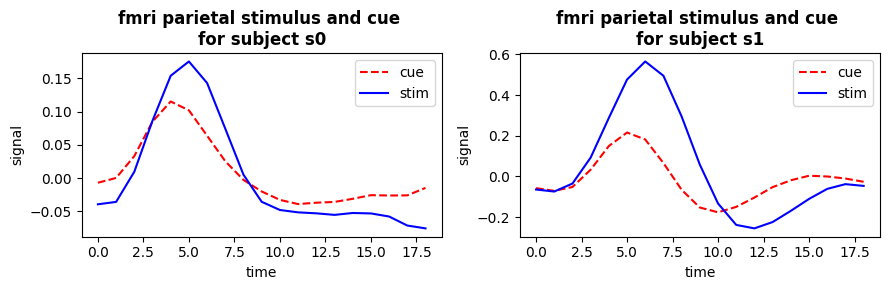

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(9,3))
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i = 0
for s in ['s0','s1']:

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax[i].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[i].set_title('fmri parietal stimulus and cue \nfor subject ' + s, fontsize=12, weight='bold')
  ax[i].set_xlabel('time')
  ax[i].set_ylabel('signal')
  ax[i].legend()

  i += 1

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib1_6.png')

In [ ]:
ax.shape

(2,)

# Q5. `sharex, sharey`

Produza um gráfico como abaixo agora para os sujeitos `s0` a `s3`, em uma mesma figura empregando empregando o modo `artist layer`. Verifique no comando `subplots()` como compartilhar os eixos. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib1_7.png)

**Quais sujeitos apresentam sinais mais intensos de estímulos?**

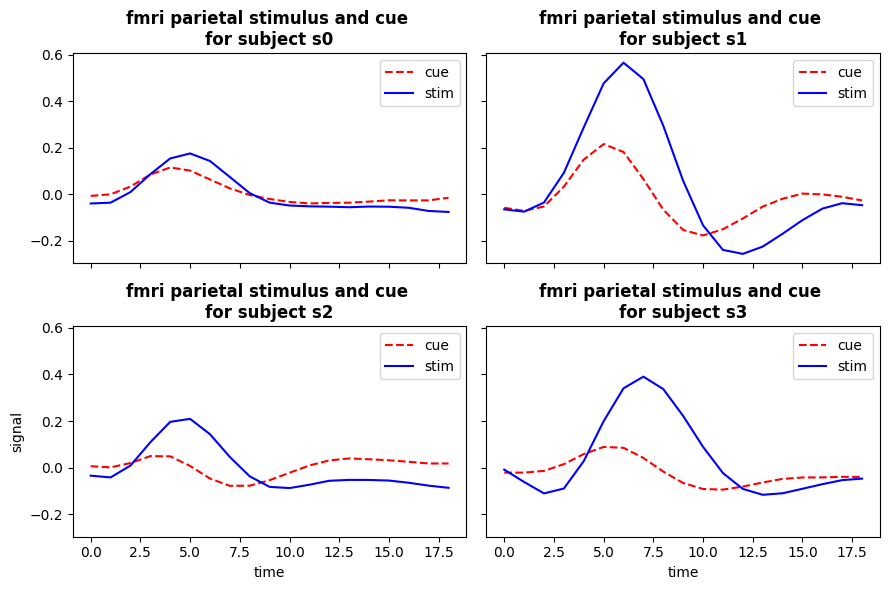

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(9,6),sharex=True,sharey=True)
linestyle = {'stim':'-','cue':'--'}
color = {'stim':'blue','cue':'red'}

i = 0
for s in ['s0','s1']:

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax[0,i].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[0,i].set_title('fmri parietal stimulus and cue \nfor subject ' + s, fontsize=12, weight='bold')
  # ax[0,i].set_xlabel('time')
  if i == 0: ax[1,i].set_ylabel('signal')
  ax[0,i].legend()

  i += 1

i = 0
for s in ['s2','s3']:

  for e in df.event.unique():
    mask = (df.subject == s) & (df.event == e) & (df.region == 'parietal')
    ax[1,i].plot(df[ mask ].timepoint, df[ mask ].signal, color=color[e], linestyle=linestyle[e], label=e)

  ax[1,i].set_title('fmri parietal stimulus and cue \nfor subject ' + s, fontsize=12, weight='bold')
  ax[1,i].set_xlabel('time')
  if i == 0: ax[1,i].set_ylabel('signal')
  ax[1,i].legend()

  i += 1

plt.tight_layout()
plt.show()

fig.savefig('ex_matplotlib1_7.png')